In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
#data collection
insurance_data=pd.read_csv("insurance.csv")

In [33]:
#print first 5 rows of datasets
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [34]:
#print last 5 rows of dataset
insurance_data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [35]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [36]:
insurance_data.shape

(1338, 7)

In [37]:
insurance_data.index

RangeIndex(start=0, stop=1338, step=1)

In [38]:
#check missing values
insurance_data.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

# Data Visualization

In [39]:
insurance_data["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


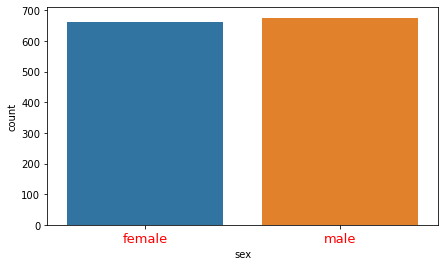

In [40]:
plt.figure(figsize=(7,4))
sns.countplot("sex",data=insurance_data)
plt.xticks(fontsize=13,color="red")
plt.show()

In [41]:
insurance_data["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


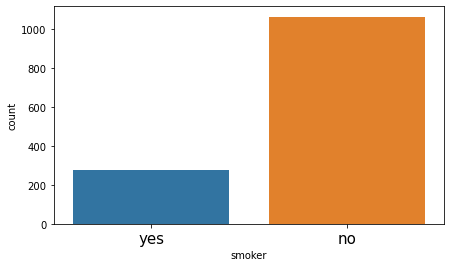

In [42]:
plt.figure(figsize=(7,4))
sns.countplot("smoker",data=insurance_data)
plt.xticks(fontsize=15,color="black")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


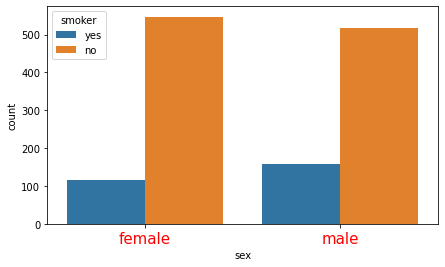

In [43]:
#check smoker w.r.t sex
plt.figure(figsize=(7,4))
sns.countplot("sex",data=insurance_data,hue="smoker")
plt.xticks(fontsize=15,color="red")
plt.show()

In [44]:
insurance_data["region"].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

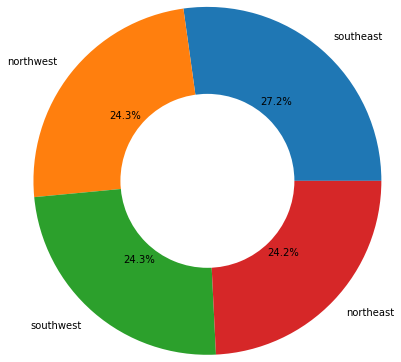

In [45]:

plt.pie(list(insurance_data["region"].value_counts()),labels=list(insurance_data["region"].value_counts().keys()),radius=2,autopct="%.1f%%")
plt.pie([1],colors=["w"],radius=1)
plt.show()

In [46]:
insurance_data["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


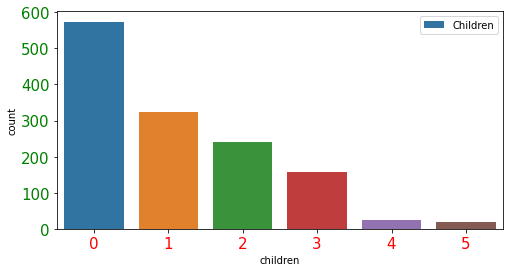

In [47]:
plt.figure(figsize=(8,4))
sns.countplot("children",data=insurance_data,label="Children")
plt.legend()
plt.xticks(fontsize=15,color="red")
plt.yticks(fontsize=15,color="green")
plt.show()

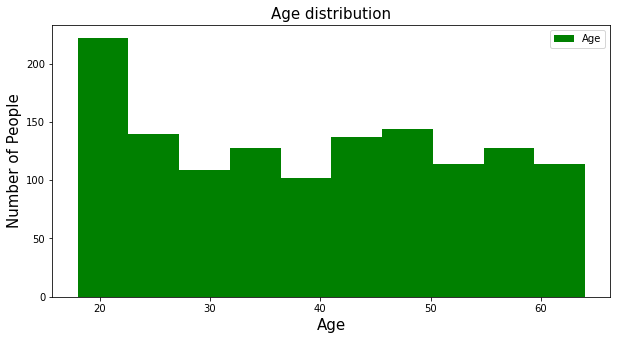

In [48]:
#age distribution
plt.figure(figsize=(10,5))
plt.hist(insurance_data["age"],stacked=True,label="Age",color="green")
plt.legend()
plt.xlabel("Age",fontsize=15)
plt.ylabel("Number of People",fontsize=15)
plt.title("Age distribution",fontsize=15)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


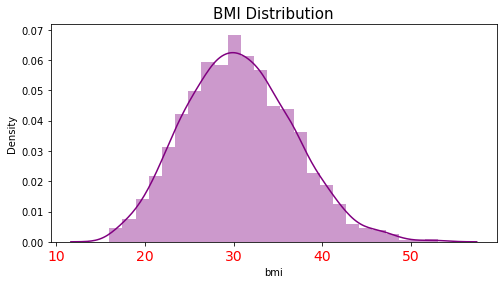

In [53]:
#bmi distribution
plt.figure(figsize=(8,4))
sns.distplot(insurance_data["bmi"],color="purple")
plt.xticks(fontsize=14,color="red")
plt.title("BMI Distribution",fontsize=15)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


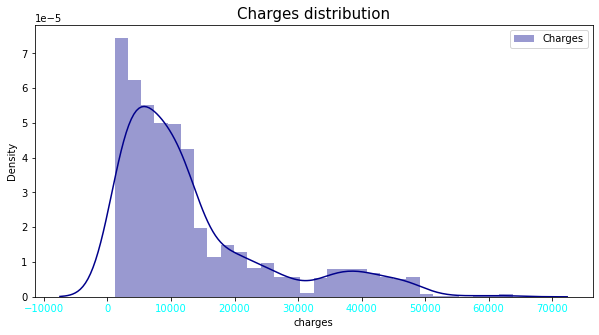

In [56]:
#charges distribution
plt.figure(figsize=(10,5))
sns.distplot(insurance_data["charges"],color="#00008B",label="Charges")
plt.title("Charges distribution",fontsize=15)
plt.legend()
plt.xticks(color="#00FFFF")
plt.show()

In [57]:
#check correlation
correlation=insurance_data.corr()

<AxesSubplot:>

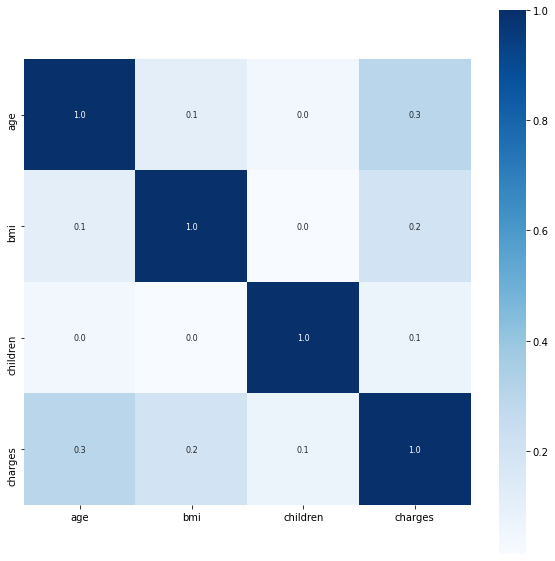

In [58]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,annot=True,annot_kws={"size":8},fmt=".1f",cmap="Blues")

In [59]:
#print statistics function
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Categorical data
1.Sex
2. Region
3. Smoker

In [60]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [63]:
insurance_data["Sex"]=encoder.fit_transform(insurance_data["sex"])
insurance_data["Smoker"]=encoder.fit_transform(insurance_data["smoker"])
insurance_data["Region"]=encoder.fit_transform(insurance_data["region"])

In [64]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges,Sex,Smoker,Region
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1


In [66]:
#feature selection
insurance_data.drop(["sex","smoker","region"],axis=1,inplace=True)

In [67]:
insurance_data.head()

,age,bmi,children,charges,Sex,Smoker,Region
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1


In [68]:
#train test split
X=insurance_data.drop(columns="charges",axis=1)
Y=insurance_data["charges"]

In [69]:
print(X)

      age     bmi  children  Sex  Smoker  Region
0      19  27.900         0    0       1       3
1      18  33.770         1    1       0       2
2      28  33.000         3    1       0       2
3      33  22.705         0    1       0       1
4      32  28.880         0    1       0       1
...   ...     ...       ...  ...     ...     ...
1333   50  30.970         3    1       0       1
1334   18  31.920         0    0       0       0
1335   18  36.850         0    0       0       2
1336   21  25.800         0    0       0       3
1337   61  29.070         0    0       1       1

[1338 rows x 6 columns]


In [70]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [71]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

x_train.shape

(1070, 6)

In [72]:
x_test.shape

(268, 6)

In [73]:
y_train.shape

(1070,)

In [74]:
y_test.shape

(268,)

In [75]:
reg=LinearRegression()

In [76]:
reg.fit(x_train,y_train)

LinearRegression()

# Model Evaluation

In [83]:
x_train_prediction=reg.predict(x_train)

#calculate r square
score_1=metrics.r2_score(x_train_prediction,y_train)
print("The r square for train data is ", score_1)

The r square for train data is  0.670199267611564


In [84]:
x_test_prediction=reg.predict(x_test)

#calculate r square
score_2=metrics.r2_score(x_test_prediction,y_test)

print("The r square for test data ",score_2)

The r square for test data  0.6621668246589314


In [88]:
reg.coef_

array([  251.36689613,   330.76133485,   589.05862101,   -35.4338166 ,
       23905.96516848,  -323.62760276])

In [89]:
reg.intercept_

-11747.467172088833

In [90]:
reg.score(x_test,y_test)

0.7445422986536503

In [91]:
reg.score(x_train,y_train)

0.7519923667088932

In [92]:
input_data=(30,1,35.3,0,1,3)

In [94]:
#conevert it into numpy array
input_numpy=np.asarray(input_data)

#reshaped it
input_reshaped=input_numpy.reshape(1,-1)

prediction=reg.predict(input_reshaped)

In [95]:
print("Price of insurance in USD ", prediction)

Price of insurance in USD  [39853.15272839]
